In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [2]:
# importing dataset
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\database_IND.csv")
pd.set_option('display.max_columns',None)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
#checking no of row and column in datset
df.shape

(908, 25)

In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
#checking basic info about dataset
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


<AxesSubplot:>

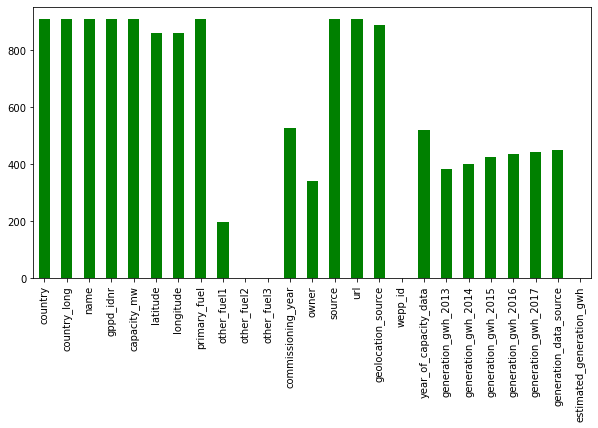

In [6]:
#checking nan value
df.count().plot.bar(figsize=(10,5),color="g")

<AxesSubplot:>

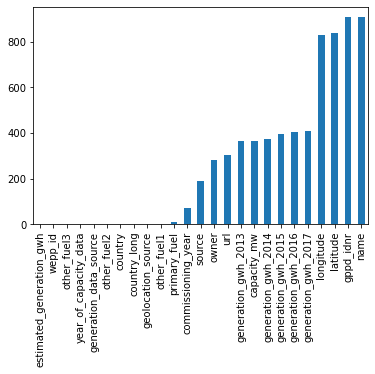

In [7]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

In [8]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
# droping column
drop=[]
for i in df:
    if df[i].isna().sum()>900:
        drop.append(i)
        

In [10]:
df.drop(columns=drop,axis=1,inplace=True)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

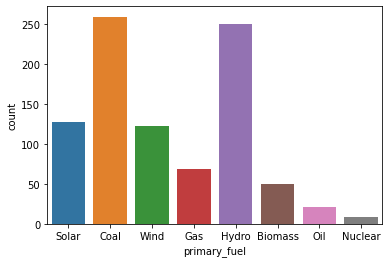

In [11]:
#univariate analysis
sns.countplot(df["primary_fuel"])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

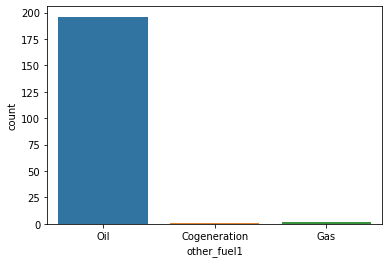

In [12]:
sns.countplot(df["other_fuel1"])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

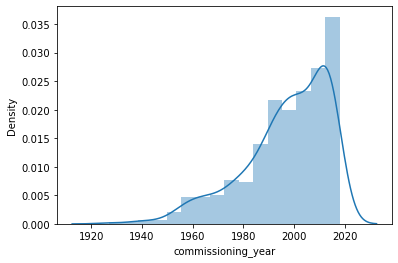

In [13]:
sns.distplot(df["commissioning_year"])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

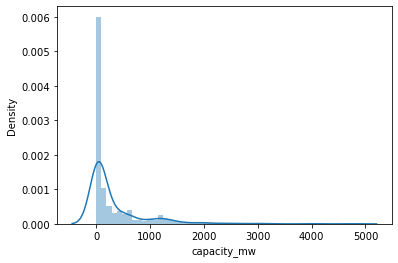

In [14]:
sns.distplot(df["capacity_mw"])

In [15]:
# droping dataset for two dataset
df1= df.drop("capacity_mw",axis=1)
df2= df.drop("primary_fuel",axis=1)

# analysis for df2 

In [16]:
#checking shape of dataset
df2.shape

(908, 20)

In [17]:
#checking no of column
df2.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [18]:
#checking info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   other_fuel1             199 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

In [19]:
#checking unique in dataset
df2.nunique().sort_values()

country                     1
year_of_capacity_data       1
generation_data_source      1
country_long                1
geolocation_source          3
other_fuel1                 3
commissioning_year         73
source                    191
owner                     280
url                       304
generation_gwh_2013       364
capacity_mw               365
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
longitude                 828
latitude                  837
name                      908
gppd_idnr                 908
dtype: int64

In [20]:
# checking only object data
features=[]
for i in df2:
    if df2[i].dtypes=="float64":
        features.append(i)
features

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

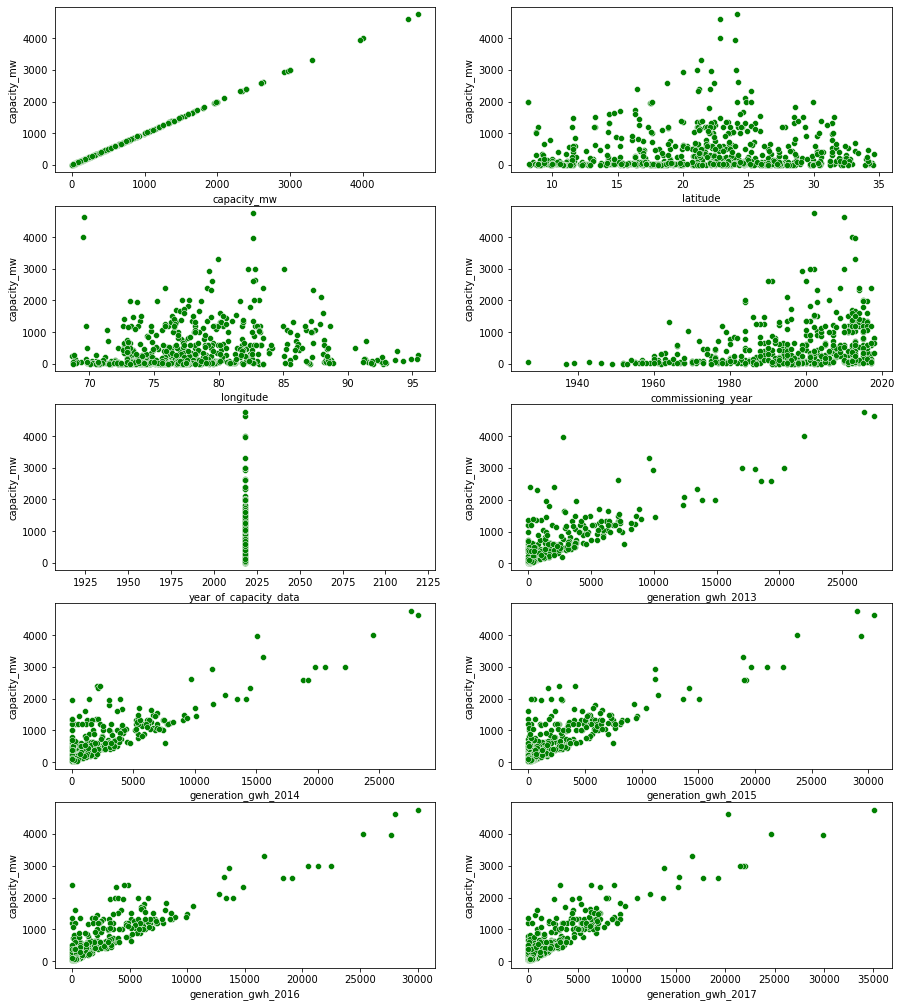

In [21]:
#bivariate analysis
plt.figure(figsize=(15,25))
plotnumber = 1
for column in df2[features]:
    if plotnumber<=21:
        ax=plt.subplot(7,2,plotnumber)
        sns.scatterplot(y=df2["capacity_mw"],x=df2[column],color="green")
    plotnumber+=1
plt.show()

In [22]:
#droping column
df2.drop(columns=["country","country_long","gppd_idnr","url","name","owner","commissioning_year","other_fuel1"],inplace=True)

In [23]:
#filling with mode
df2["generation_data_source"]=df2["generation_data_source"].fillna(df2["generation_data_source"].mode()[0])

In [24]:
df2["geolocation_source"]=df2["geolocation_source"].fillna(df2["geolocation_source"].mode()[0])

In [25]:
# for converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [26]:
label=LabelEncoder()

In [27]:
df2["source"]=label.fit_transform(df2.source)
df2["geolocation_source"]=label.fit_transform(df2.geolocation_source)
df2["generation_data_source"]=label.fit_transform(df2.generation_data_source)

<function matplotlib.pyplot.show(close=None, block=None)>

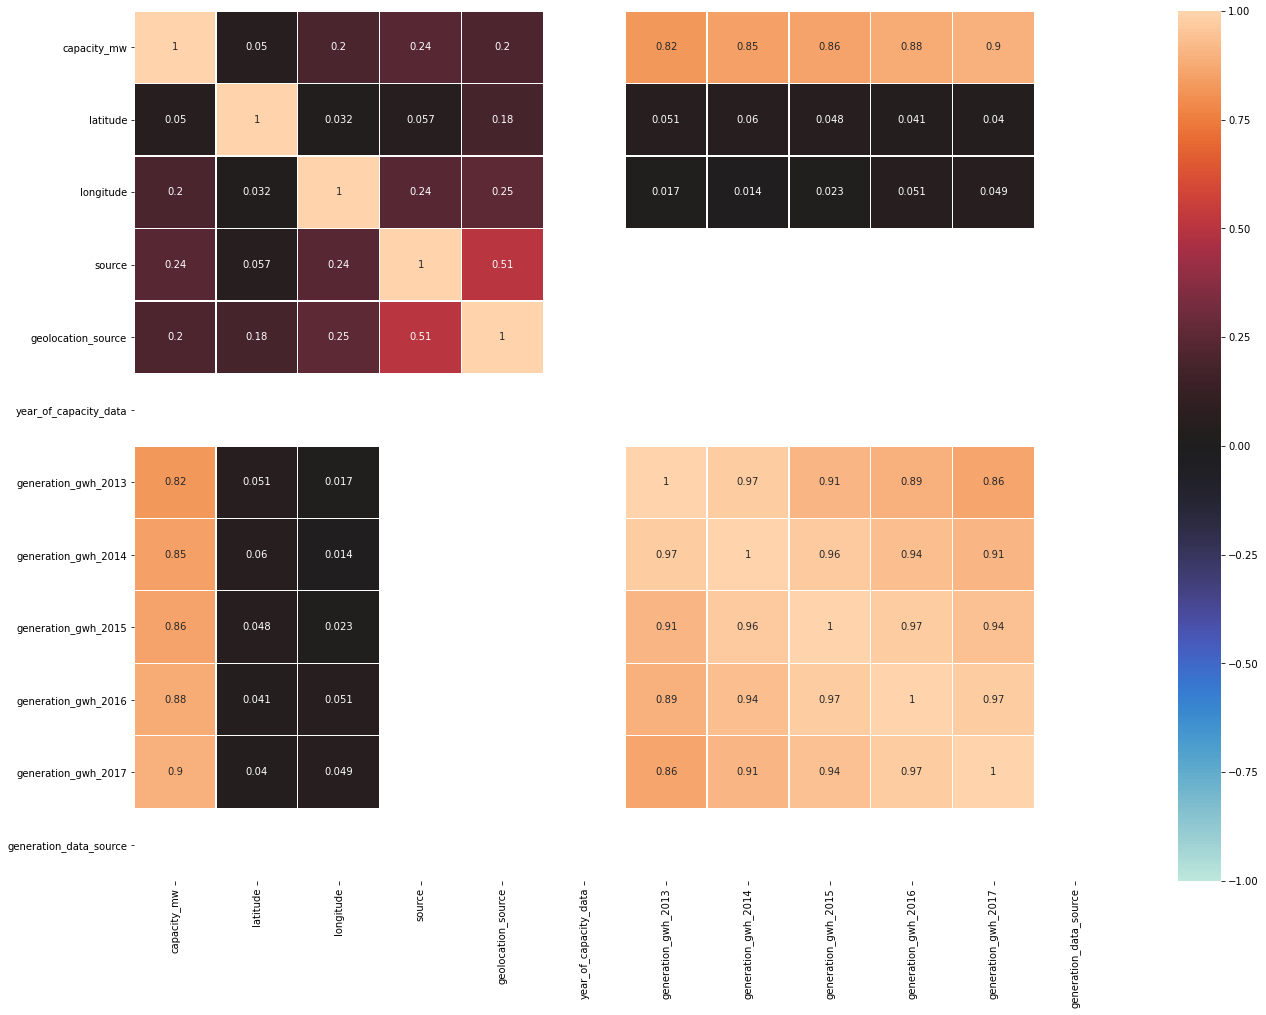

In [28]:
#multivsriste analysis
df_corr=df2.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

# Data cleaning

In [29]:
#dropping nan value
index = np.where(df2["longitude"].isna())
df2.drop(df2.index[index],inplace=True,axis=0)

In [30]:
df2.drop(columns=["year_of_capacity_data","generation_data_source"],inplace=True,axis=1)

In [31]:
df2.shape

(862, 10)

In [32]:
#using imputer for filling nan values
from sklearn .experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [33]:
iter_imputer= IterativeImputer(random_state=0)
iter_imputer.fit(df2)

IterativeImputer(random_state=0)

In [34]:
new_df2=iter_imputer.transform(df2)

In [35]:
cols=['capacity_mw','latitude', 'longitude', 'source', 'geolocation_source','generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']

In [36]:
df_2=pd.DataFrame(new_df2[:,[df2.columns.get_loc(i)for i in cols]],columns=cols)

In [37]:
df_2.isna().sum()

capacity_mw            0
latitude               0
longitude              0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

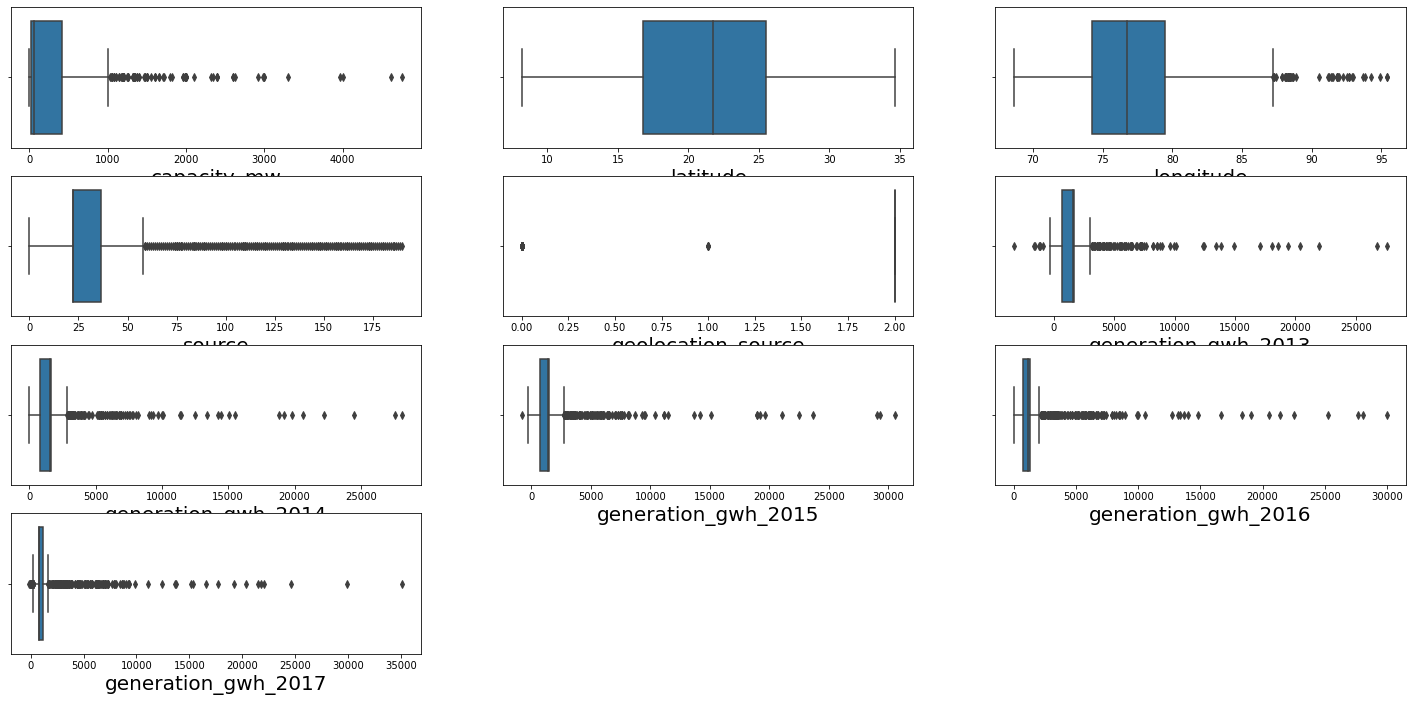

In [38]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,15))
plotnumber = 1
for column in df_2:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df_2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
df_2.shape

(862, 10)

In [40]:
# for removing outliers
from scipy.stats import zscore

In [41]:
zscr=zscore(df_2[['generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_score=np.abs(zscr)

In [42]:
filter=(abs_score<3).all (axis=1)

In [43]:
new_df_2=df_2[filter]

In [44]:
new_df_2.shape

(844, 10)

In [45]:
# for outlier removal
new_df_2=new_df_2[new_df_2['generation_gwh_2013']<new_df_2['generation_gwh_2013'].quantile(0.99)]
new_df_2=new_df_2[new_df_2['generation_gwh_2017']<new_df_2['generation_gwh_2017'].quantile(0.99)]

In [46]:
new_df_2.shape

(826, 10)

In [47]:
#checking skewness
new_df_2.skew()

capacity_mw            2.275871
latitude              -0.128998
longitude              1.181604
source                 1.712811
geolocation_source    -2.003087
generation_gwh_2013    1.932860
generation_gwh_2014    2.177584
generation_gwh_2015    2.214598
generation_gwh_2016    2.461670
generation_gwh_2017    2.470298
dtype: float64

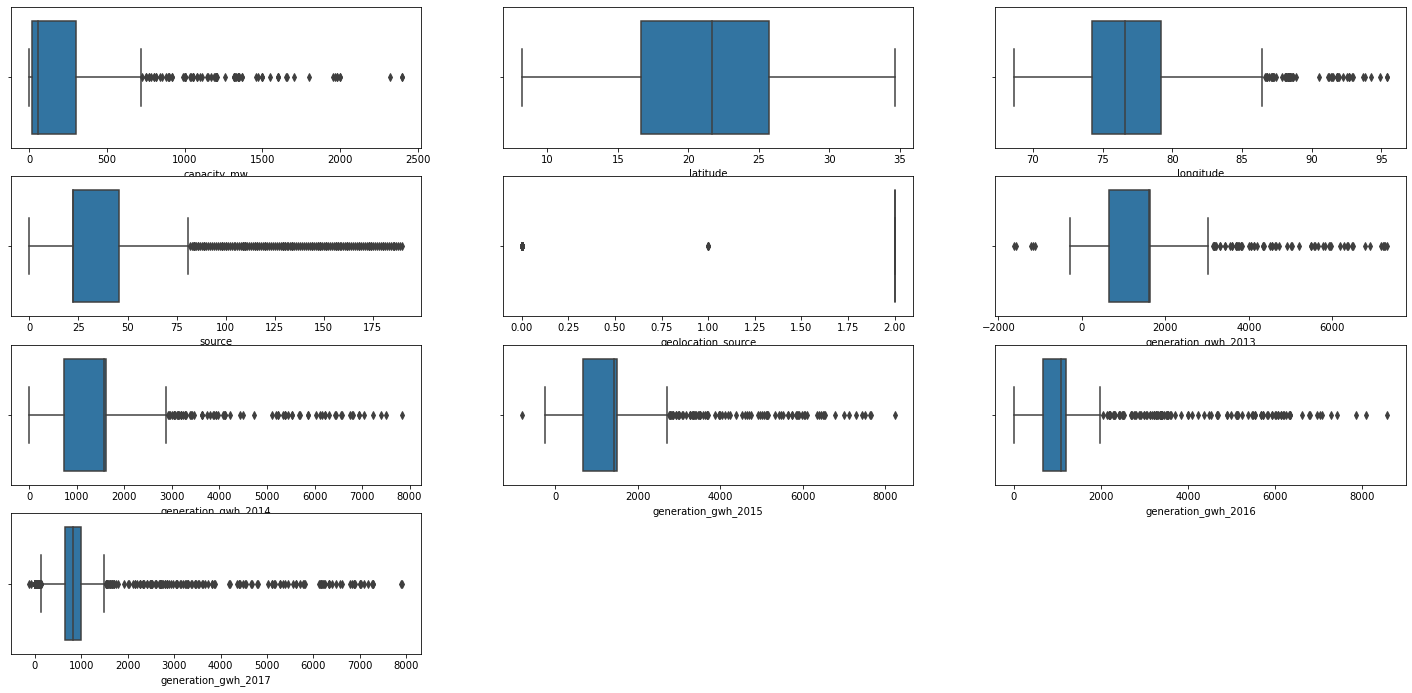

In [48]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,15))
plotnumber = 1
for column in new_df_2:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(new_df_2[column])
        
    plotnumber+=1
plt.show()

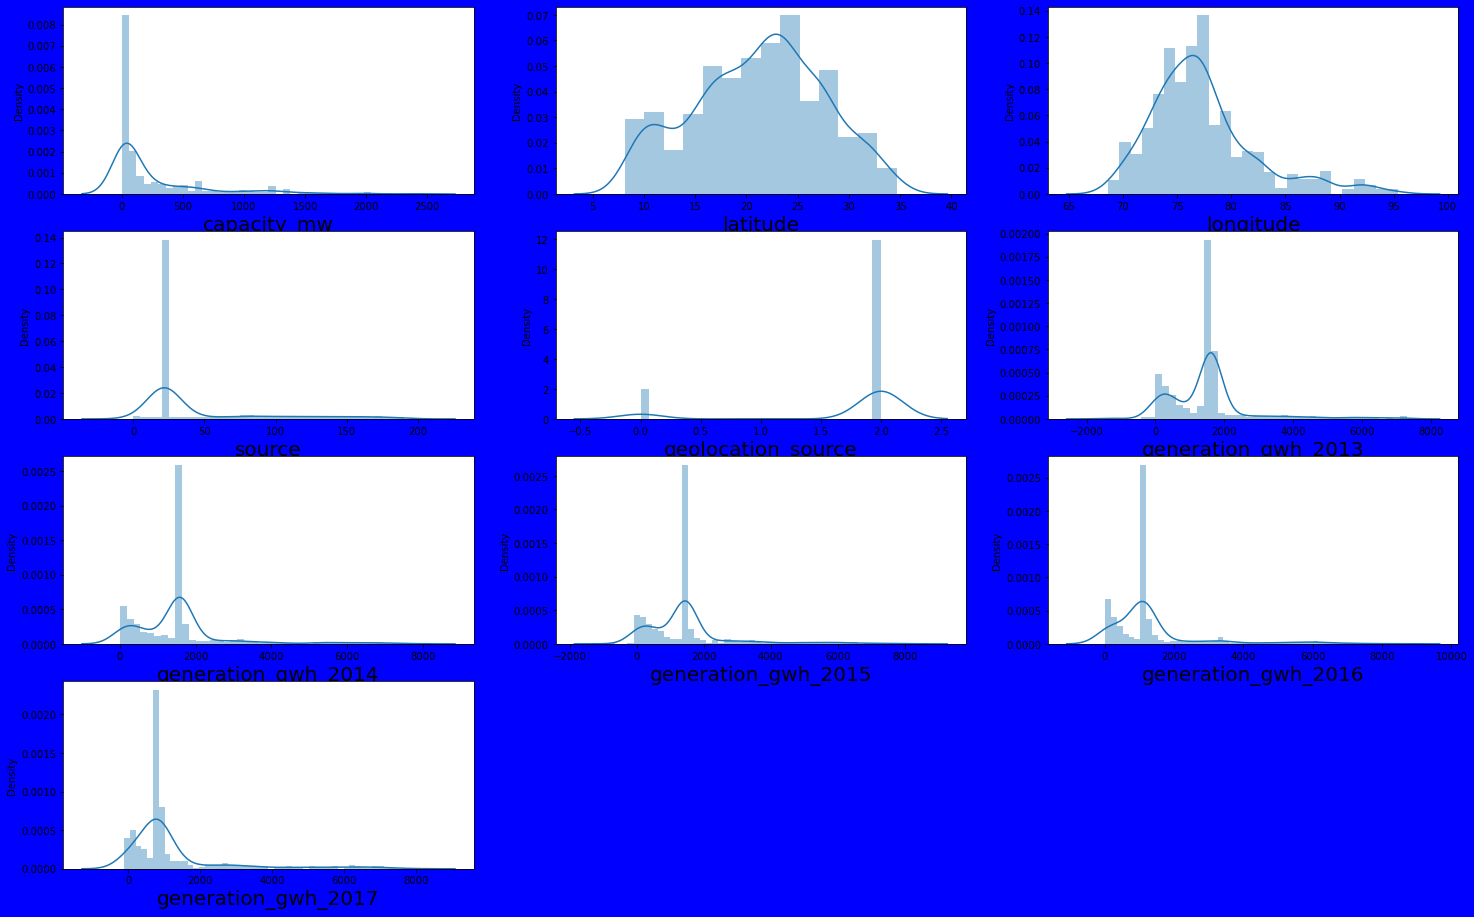

In [49]:
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df_2:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df_2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [50]:
# for skewness removal 
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method="yeo-johnson")

In [51]:
new_df_2[['generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]=scale.fit_transform(new_df_2[['generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].values)
new_df_2

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,109.0,1.0,0.116466,0.249095,0.024260,0.078917,-0.196773
1,98.0,24.7663,74.6090,174.0,2.0,0.176473,0.334967,0.137621,0.259170,0.036903
2,39.2,21.9038,69.3732,21.0,2.0,0.139580,0.282369,0.067827,0.150068,-0.105349
3,135.0,23.8712,91.3602,22.0,2.0,-0.685472,-0.675225,-0.437630,-0.086493,-0.302744
4,1800.0,21.9603,82.4091,22.0,2.0,0.170113,1.186914,3.008254,2.417995,2.456609
...,...,...,...,...,...,...,...,...,...,...
857,1600.0,16.2949,77.3568,22.0,2.0,-0.578891,-0.738782,-1.299366,-1.034755,-0.117831
858,3.0,12.8932,78.1654,77.0,0.0,0.116074,0.248364,0.023835,0.079499,-0.197005
859,25.5,15.2758,75.5811,21.0,2.0,0.130458,0.269230,0.050969,0.123839,-0.139506
860,80.0,24.3500,73.7477,59.0,2.0,0.165168,0.318990,0.116349,0.226675,-0.005458


In [52]:
new_df_2.skew()

capacity_mw            2.275871
latitude              -0.128998
longitude              1.181604
source                 1.712811
geolocation_source    -2.003087
generation_gwh_2013    1.284205
generation_gwh_2014   -0.032953
generation_gwh_2015    0.933273
generation_gwh_2016    0.051635
generation_gwh_2017    0.688682
dtype: float64

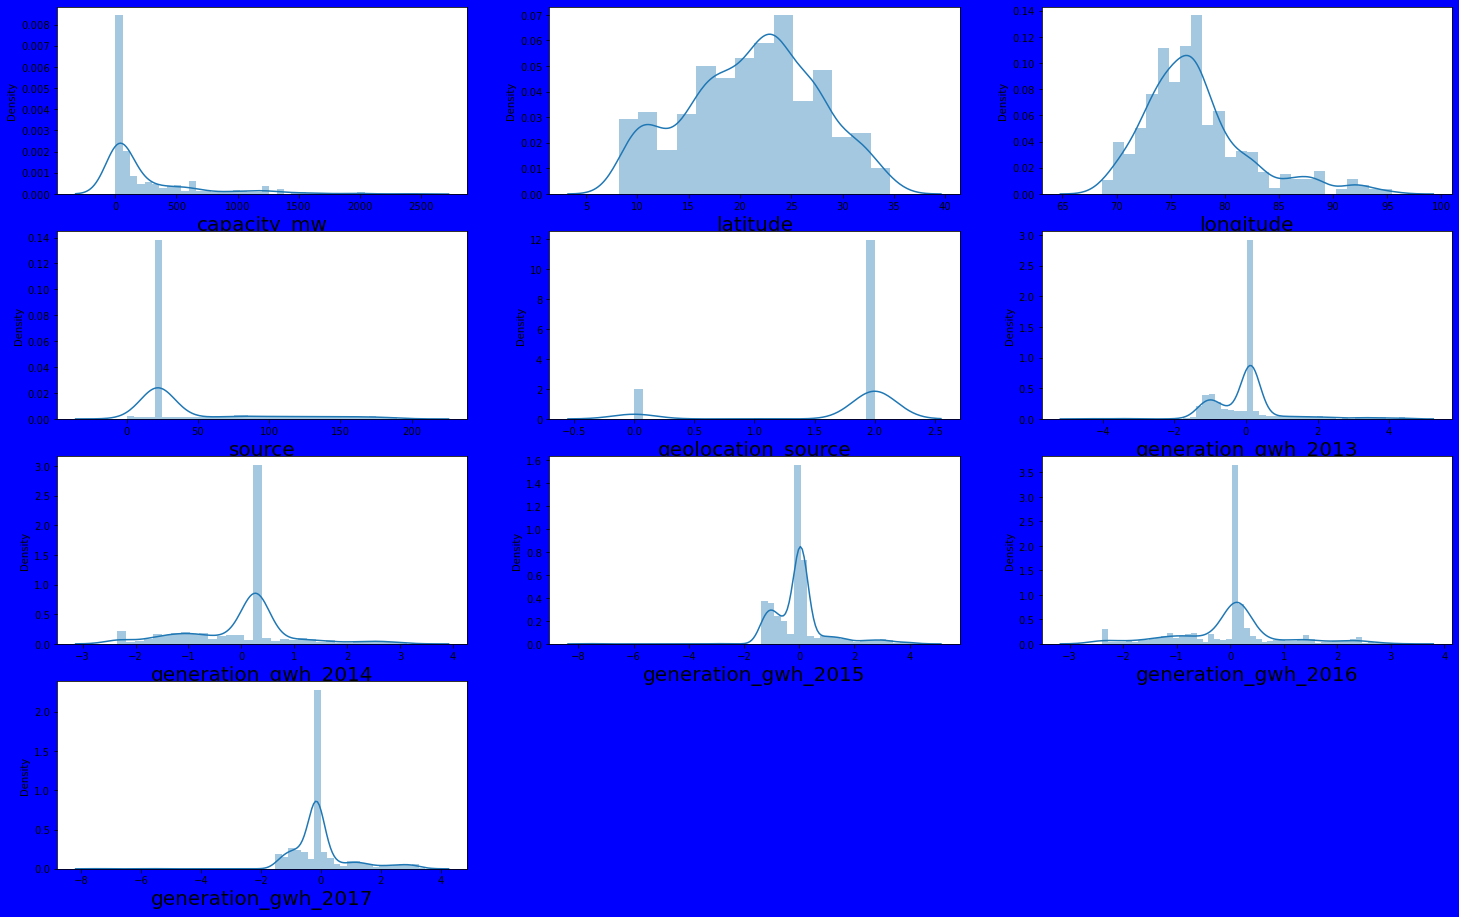

In [53]:
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df_2:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df_2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
#splitting dataset
x=new_df_2.drop(columns=['capacity_mw',],axis=1)
y=new_df_2["capacity_mw"]

In [55]:
#importing regression model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


In [56]:
#scaling dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=140)

# AdaBoostRegressor

In [59]:
ada =AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [61]:
y_pred=ada.predict(x_test)

In [62]:
r2_score(y_test,y_pred)

0.6011132236839438

In [63]:
cross_val_score(ada,x_scaled,y,cv=8).mean()

0.5654964737747823

# XGBRegressor

In [64]:
xg =XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred=xg.predict(x_test)

In [66]:
r2_score(y_test,y_pred)

0.7721923741778546

In [67]:
cross_val_score(xg,x_scaled,y,cv=8).mean()

0.7418915495134848

# GradientBoostingRegressor

In [68]:
gd =GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [69]:
y_pred=gd.predict(x_test)

In [70]:
r2_score(y_test,y_pred)

0.7804142093408851

In [71]:
cross_val_score(gd,x_scaled,y,cv=8).mean()

0.7705475142565046

# BaggingRegressor

In [72]:
bg =BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor()

In [73]:
y_pred=bg.predict(x_test)

In [74]:
r2_score(y_test,y_pred)

0.8439761467484629

In [75]:
cross_val_score(bg,x_scaled,y,cv=8).mean()

0.7857996504282336

# GradientBoostingRegressor is my best model

In [76]:
# para meter tuning
grid_params={"n_estimators":[100,200,300,400,500],
             "warm_start":[True,False],
             "max_features":[0,1,2,3,4,5],
             "max_depth":[1,2,3,4,5]
            }

In [77]:
grid_search = GridSearchCV(estimator = gd,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'warm_start': [True, False]})

In [89]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 500, 'warm_start': False}

In [94]:
gd =GradientBoostingRegressor(n_estimators=500,warm_start=False,max_features=3,max_depth=5)
gd.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, max_features=3, n_estimators=500)

In [95]:
y_pred=gd.predict(x_test)

In [96]:
r2_score(y_test,y_pred)

0.8186973550711621

In [97]:
cross_val_score(gd,x_scaled,y,cv=8).mean()

0.7907493260626777

In [98]:
#saving dataset
import pickle
filename='powerplant.pk1'
pickle.dump(gd,open(filename,'wb'))

# df1 analysis 

In [99]:
#checking shape of dataset
df1.shape

(908, 20)

In [100]:
#for checking no of column
df1.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [101]:
#checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   latitude                862 non-null    float64
 5   longitude               862 non-null    float64
 6   primary_fuel            908 non-null    object 
 7   other_fuel1             199 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

In [102]:
#checking unique in dataset
df1.nunique().sort_values()

country                     1
year_of_capacity_data       1
generation_data_source      1
country_long                1
geolocation_source          3
other_fuel1                 3
primary_fuel                8
commissioning_year         73
source                    191
owner                     280
url                       304
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
longitude                 828
latitude                  837
name                      908
gppd_idnr                 908
dtype: int64

In [103]:
# checking only object data
features=[]
for i in df1:
    if df1[i].dtypes=="float64":
        features.append(i)
features

['latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [104]:
#droping unwanted column
df1.drop(columns=["country","country_long","gppd_idnr","url","name","owner","commissioning_year","other_fuel1"],inplace=True)

In [105]:
#filling nan value with mode 
df1["generation_data_source"]=df1["generation_data_source"].fillna(df1["generation_data_source"].mode()[0])

In [106]:
df1["geolocation_source"]=df1["geolocation_source"].fillna(df1["geolocation_source"].mode()[0])

In [107]:
#using label encoder as it is initiated and defined earlier 
df1["source"]=label.fit_transform(df1.source)
df1["geolocation_source"]=label.fit_transform(df1.geolocation_source)
df1["generation_data_source"]=label.fit_transform(df1.generation_data_source)
df1["primary_fuel"]=label.fit_transform(df1.primary_fuel)

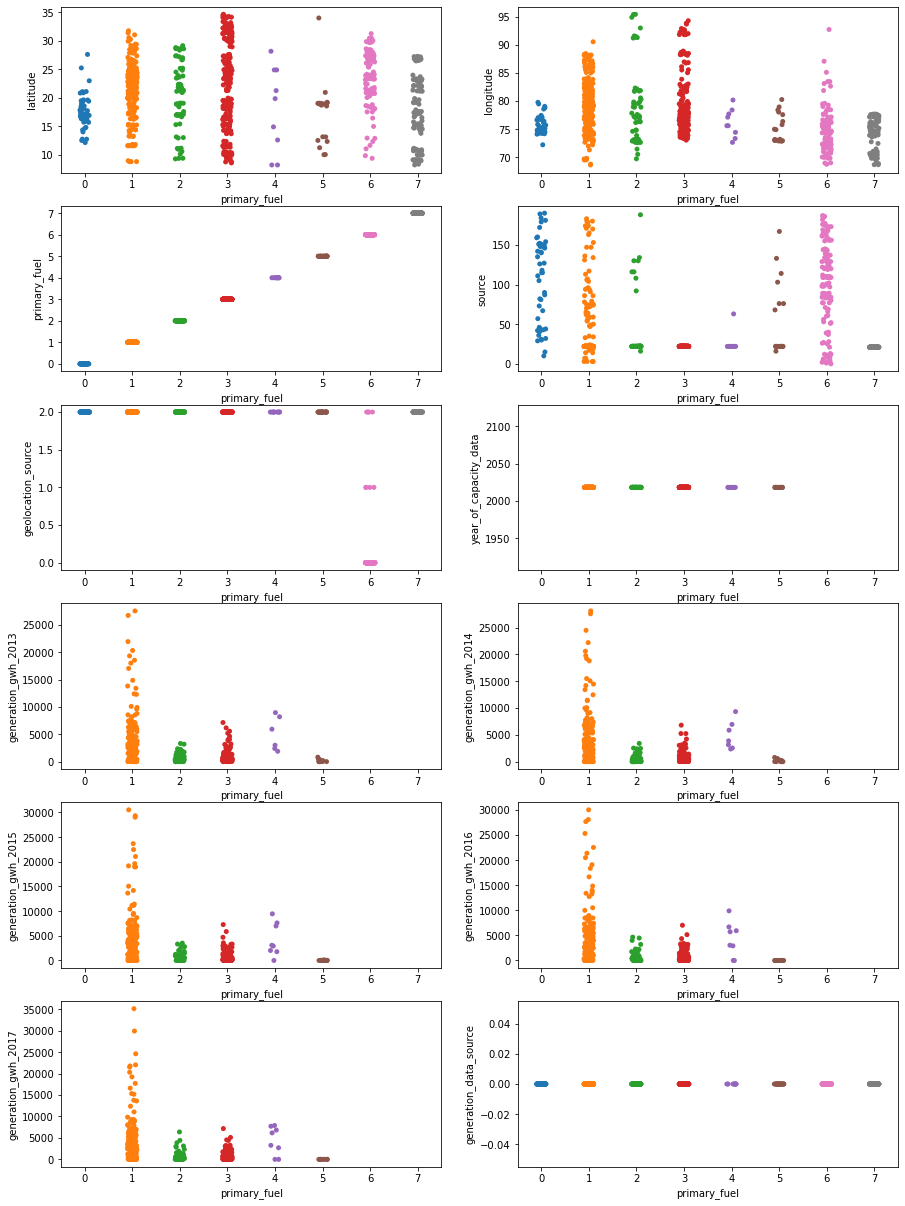

In [108]:
# bivariate analysis
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df1:
    if plotnumber < 15:
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(df1["primary_fuel"],df1[i])
        plotnumber+=1
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

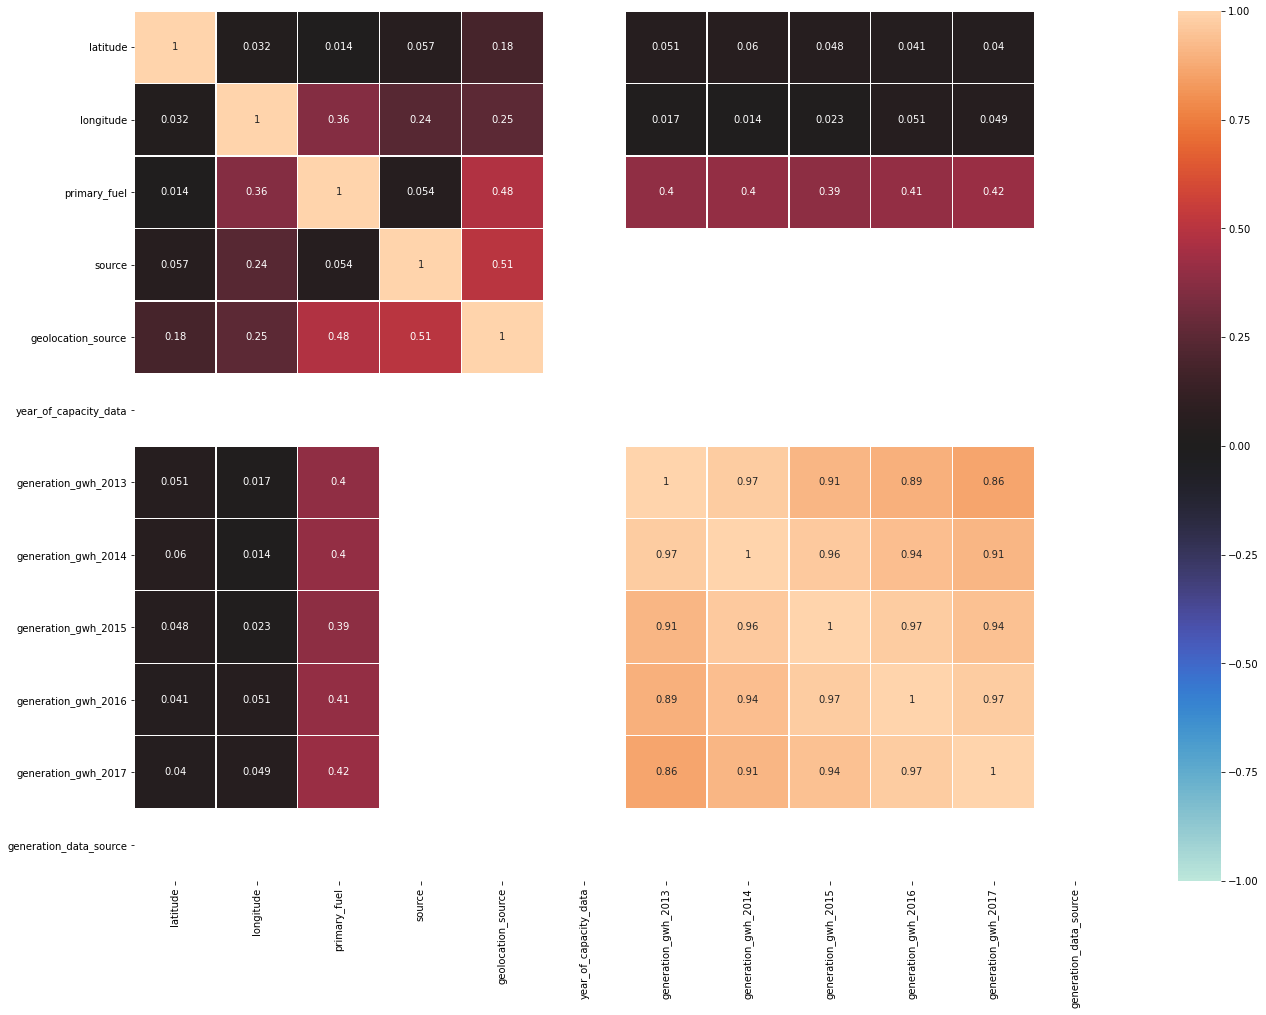

In [109]:
#multivsriste analysis
df_corr=df1.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [110]:
df1.shape

(908, 12)

# data cleaning

In [111]:
# droping nan value
index = np.where(df1["longitude"].isna())
df1.drop(df1.index[index],inplace=True,axis=0)

In [112]:
# droping unwanted column
df1.drop(columns=["year_of_capacity_data","generation_data_source"],inplace=True,axis=1)

In [113]:
df1.shape

(862, 10)

In [114]:
#for filling nan value
iter_imputer= IterativeImputer(random_state=0)
iter_imputer.fit(df1)

IterativeImputer(random_state=0)

In [115]:
# using below method to fill missing value
new_df1=iter_imputer.transform(df1)

In [116]:
cols=['primary_fuel','latitude', 'longitude', 'source', 'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']

In [117]:
df_1=pd.DataFrame(new_df1[:,[df1.columns.get_loc(i)for i in cols]],columns=cols)

In [118]:
df_1.isna().sum()

primary_fuel           0
latitude               0
longitude              0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

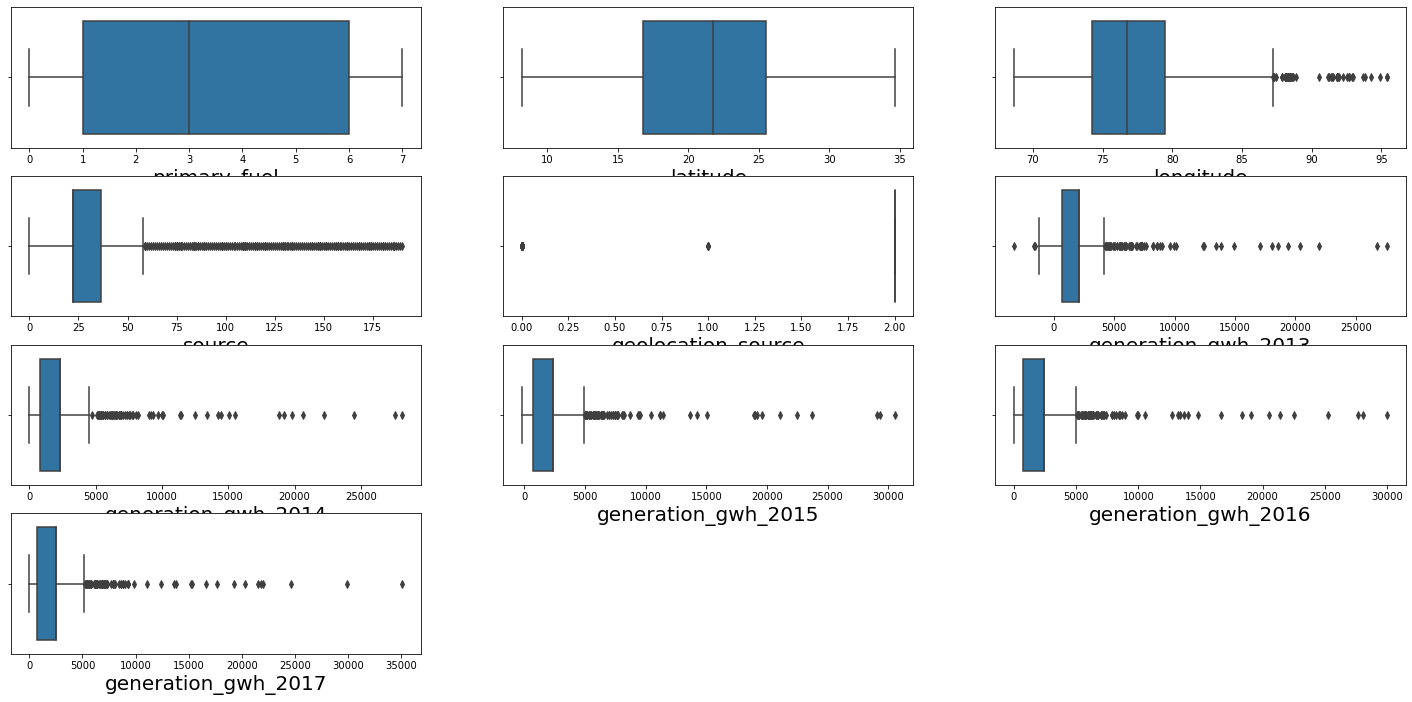

In [119]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,15))
plotnumber = 1
for column in df_1:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [120]:
#for outlier removal
z_scr=zscore(df_1[['generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_score=np.abs(z_scr)

In [121]:
filter1=(abs_score<3).all (axis=1)

In [122]:
new_df_1=df_1[filter1]

In [123]:
new_df_1.shape

(844, 10)

In [124]:
# .quantile for outlier removal
new_df_1=new_df_1[new_df_1['generation_gwh_2013']<new_df_1['generation_gwh_2013'].quantile(0.99)]
new_df_1=new_df_1[new_df_1['generation_gwh_2017']<new_df_1['generation_gwh_2017'].quantile(0.99)]

In [125]:
new_df_1.shape

(826, 10)

In [126]:
new_df_1.skew()

primary_fuel           0.444929
latitude              -0.128998
longitude              1.181604
source                 1.712811
geolocation_source    -2.003087
generation_gwh_2013    1.218490
generation_gwh_2014    1.162636
generation_gwh_2015    1.007479
generation_gwh_2016    0.956615
generation_gwh_2017    0.851245
dtype: float64

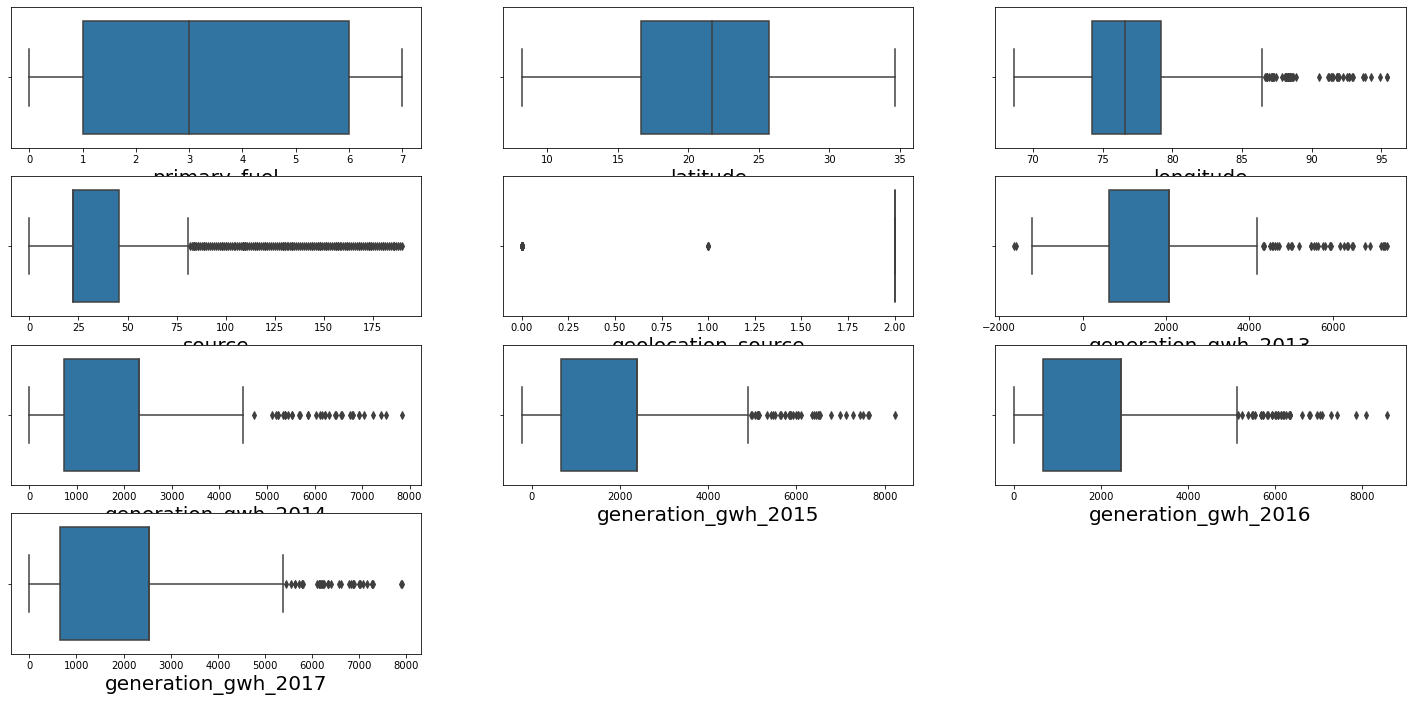

In [127]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,15))
plotnumber = 1
for column in new_df_1:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(new_df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

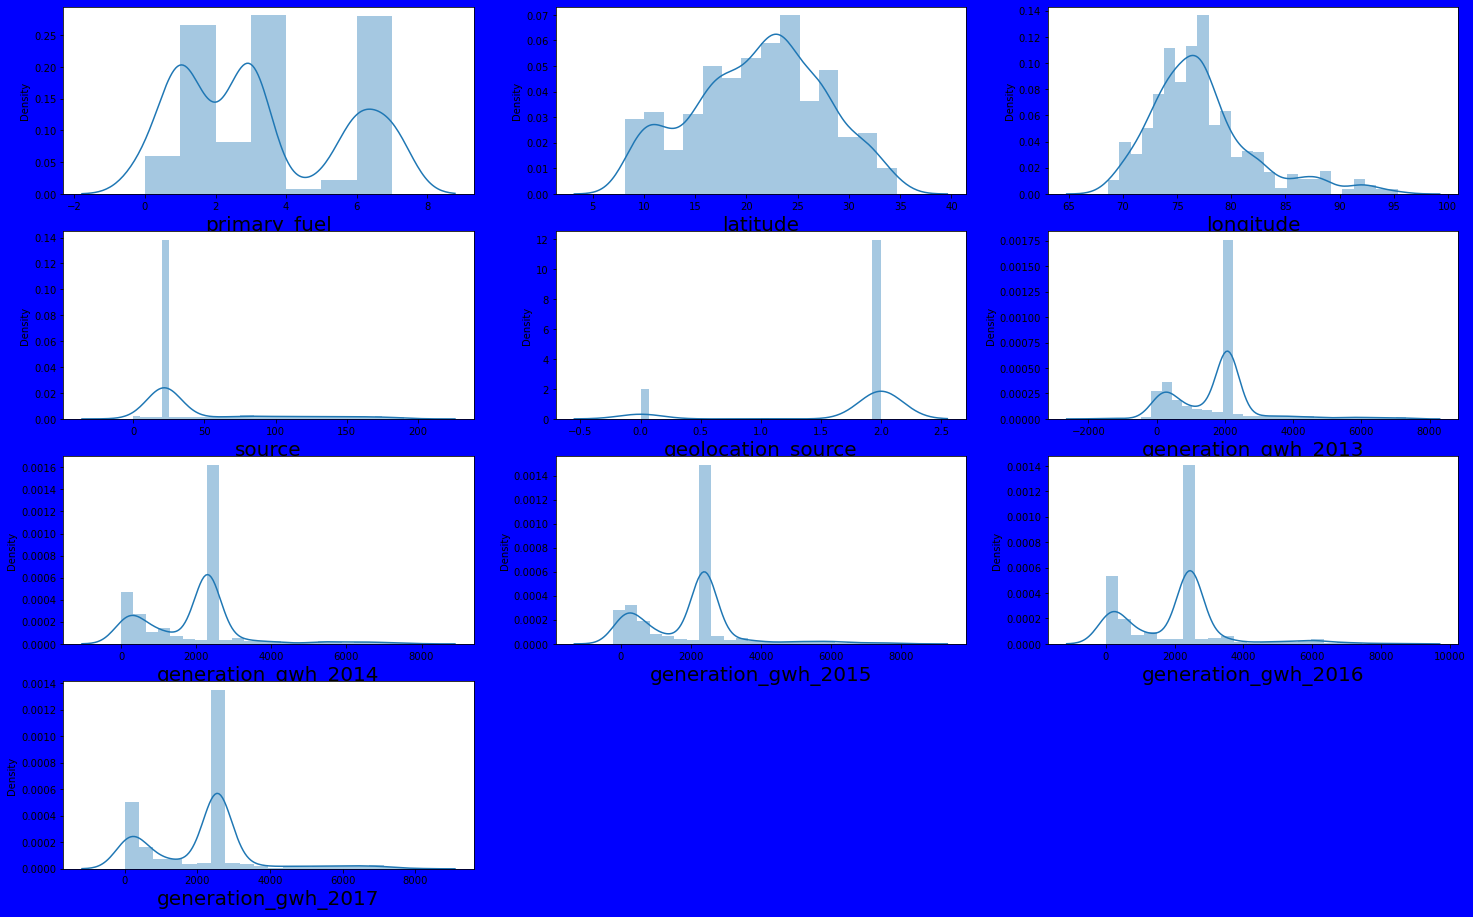

In [128]:
# for checking skewness
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df_1:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [129]:
# for skewness removal 
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method="yeo-johnson")

In [130]:
new_df_1[['generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2014']]=scale.fit_transform(new_df_1[[
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2014']].values)
new_df_1

,primary_fuel,latitude,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6.0,28.1839,73.2407,109.0,1.0,2082.877574,0.450464,0.396445,0.454894,0.448170
1,1.0,24.7663,74.6090,174.0,2.0,2082.418263,0.450185,0.396283,0.454970,0.448184
2,7.0,21.9038,69.3732,21.0,2.0,2083.161053,0.450569,0.396560,0.454852,0.447641
3,2.0,23.8712,91.3602,22.0,2.0,631.777928,-0.894222,-0.716547,-0.605559,-0.843709
4,1.0,21.9603,82.4091,22.0,2.0,1668.290000,0.878584,2.386646,2.089314,1.684934
...,...,...,...,...,...,...,...,...,...,...
857,1.0,16.2949,77.3568,22.0,2.0,350.702937,-1.299162,-1.672783,-1.357754,-0.656751
858,6.0,12.8932,78.1654,77.0,0.0,2081.950741,0.449483,0.395695,0.454821,0.447445
859,7.0,15.2758,75.5811,21.0,2.0,2082.331011,0.449797,0.395939,0.454816,0.447463
860,1.0,24.3500,73.7477,59.0,2.0,2082.497692,0.450243,0.396335,0.454969,0.448131


In [131]:
new_df_1.skew()

primary_fuel           0.444929
latitude              -0.128998
longitude              1.181604
source                 1.712811
geolocation_source    -2.003087
generation_gwh_2013    1.218490
generation_gwh_2014   -0.285753
generation_gwh_2015   -0.003213
generation_gwh_2016   -0.377745
generation_gwh_2017   -0.413741
dtype: float64

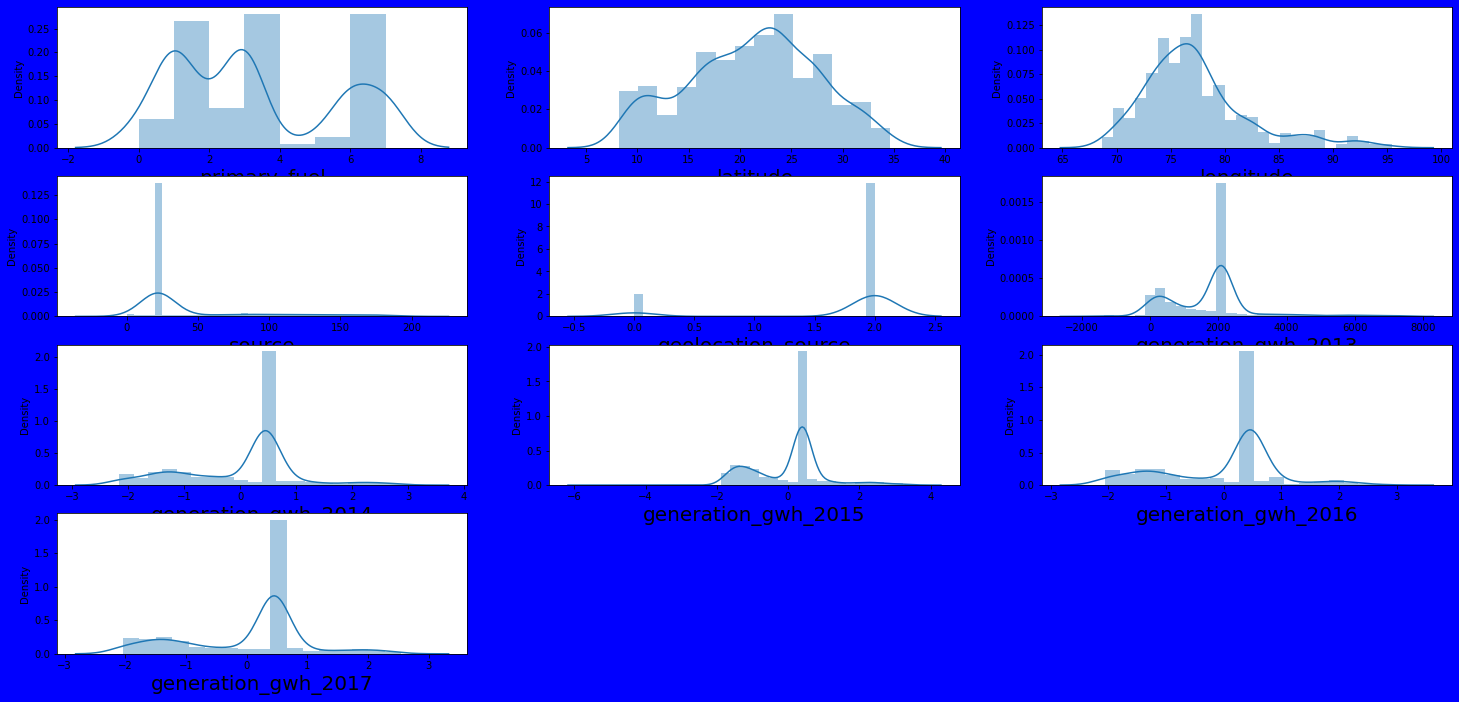

In [132]:
plt.figure(figsize=(25,15),facecolor='blue')
plotnumber = 1
for column in new_df_1:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [133]:
#final dataset
x1=new_df_1.drop(columns=['primary_fuel'],axis=1)
y1=new_df_1["primary_fuel"]

In [134]:
# model building
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
#scaling dataset
scale=StandardScaler()
x_scaled1=scale.fit_transform(x1)


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled1,y1,test_size=0.30,random_state=140)

# XGBClassifier

In [192]:
xg = XGBClassifier(verbosity=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [193]:
y_pred=xg.predict(x_test)

In [194]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.77      0.92      0.84        62
         2.0       0.62      0.40      0.48        20
         3.0       0.91      0.89      0.90        70
         4.0       0.00      0.00      0.00         2
         5.0       0.25      0.20      0.22         5
         6.0       1.00      1.00      1.00        40
         7.0       1.00      1.00      1.00        29

    accuracy                           0.87       248
   macro avg       0.69      0.67      0.67       248
weighted avg       0.86      0.87      0.86       248



In [195]:
accuracy_score(y_test,y_pred)

0.8709677419354839

In [141]:
cross_val_score(xg,x_scaled1,y1,cv=5).mean()

0.8595910916392843

In [142]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[19  1  0  0  0  0  0  0]
 [ 1 57  2  2  0  0  0  0]
 [ 0  7  8  3  0  2  0  0]
 [ 0  6  1 62  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 29]]


# GradientBoostingClassifier

In [143]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [144]:
y_pred=gd.predict(x_test)

In [145]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.75      0.87      0.81        62
         2.0       0.46      0.30      0.36        20
         3.0       0.87      0.89      0.88        70
         4.0       0.00      0.00      0.00         2
         5.0       0.33      0.20      0.25         5
         6.0       1.00      1.00      1.00        40
         7.0       1.00      1.00      1.00        29

    accuracy                           0.85       248
   macro avg       0.67      0.65      0.66       248
weighted avg       0.83      0.85      0.84       248



In [146]:
accuracy_score(y_test,y_pred)

0.8508064516129032

In [147]:
cross_val_score(gd,x_scaled1,y1,cv=5).mean()

0.8353924790069367

In [148]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[19  1  0  0  0  0  0  0]
 [ 1 54  2  5  0  0  0  0]
 [ 0  9  6  3  0  2  0  0]
 [ 0  6  2 62  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 29]]


# BaggingClassifier

In [149]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [150]:
y_pred=gd.predict(x_test)

In [151]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.75      0.87      0.81        62
         2.0       0.46      0.30      0.36        20
         3.0       0.87      0.89      0.88        70
         4.0       0.00      0.00      0.00         2
         5.0       0.33      0.20      0.25         5
         6.0       1.00      1.00      1.00        40
         7.0       1.00      1.00      1.00        29

    accuracy                           0.85       248
   macro avg       0.67      0.65      0.66       248
weighted avg       0.83      0.85      0.84       248



In [152]:
accuracy_score(y_test,y_pred)

0.8508064516129032

In [153]:
cross_val_score(bg,x_scaled1,y1,cv=5).mean()

0.838977729098211

In [154]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[19  1  0  0  0  0  0  0]
 [ 1 54  2  5  0  0  0  0]
 [ 0  9  6  3  0  2  0  0]
 [ 0  6  2 62  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 29]]


# LogisticRegression

In [155]:
dt= LogisticRegression()
dt.fit(x_train,y_train)

LogisticRegression()

In [156]:
y_pred=dt.predict(x_test)

In [157]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.78      0.35      0.48        20
         1.0       0.60      0.68      0.64        62
         2.0       0.00      0.00      0.00        20
         3.0       0.61      0.73      0.67        70
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00        40
         7.0       0.61      0.97      0.75        29

    accuracy                           0.68       248
   macro avg       0.45      0.47      0.44       248
weighted avg       0.62      0.68      0.63       248



In [158]:
accuracy_score(y_test,y_pred)

0.6774193548387096

In [159]:
cross_val_score(dt,x_scaled1,y1,cv=5).mean()

0.6440963855421686

In [160]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 7 11  0  0  0  0  0  2]
 [ 1 42  0 15  0  0  0  4]
 [ 1  3  0 12  0  0  0  4]
 [ 0 11  0 51  0  0  0  8]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  1  0  0  0  0  0 28]]


# XGBClassifier is my best model 

In [172]:
# hyperparameter tunning
grid_params= {"n_estimators":[50,100,150,200,300],
              "random_state":[0,10,20,30,50],
              "gamma":[0.1,0.01,0.001,0.0001],
              "criterion":["gini","entropy"]
}

In [173]:
grid_search = GridSearchCV(estimator = xg,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [174]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, criterion='gini',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=300, n_jobs=8,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
    

In [175]:
grid_search.best_params_

{'criterion': 'gini', 'gamma': 0.0001, 'n_estimators': 300, 'random_state': 0}

In [203]:
xg = XGBClassifier(criterion='gini', gamma=0.0001, n_estimators=300, random_state=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini',
              gamma=0.0001, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [204]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        20
         1.0       0.77      0.92      0.84        62
         2.0       0.62      0.40      0.48        20
         3.0       0.91      0.89      0.90        70
         4.0       0.00      0.00      0.00         2
         5.0       0.25      0.20      0.22         5
         6.0       1.00      1.00      1.00        40
         7.0       1.00      1.00      1.00        29

    accuracy                           0.87       248
   macro avg       0.69      0.67      0.67       248
weighted avg       0.86      0.87      0.86       248



In [205]:
accuracy_score(y_test,y_pred)

0.8709677419354839

In [206]:
cross_val_score(xg,x_scaled1,y1,cv=5).mean()

0.8608032128514056

In [169]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[ 7 11  0  0  0  0  0  2]
 [ 1 42  0 15  0  0  0  4]
 [ 1  3  0 12  0  0  0  4]
 [ 0 11  0 51  0  0  0  8]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  1  0  0  0  0  0 28]]


In [211]:
#logistic regression
print("LogisticRegression roc_auc_score :",roc_auc_score(y_test,dt.predict_proba(x_test),multi_class='ovr'))


#BaggingClassifier
print("BaggingClassifier roc_auc_score :",roc_auc_score(y_test,bg.predict_proba(x_test),multi_class='ovr'))

#
print("DecisionTree roc_auc_score :",roc_auc_score(y_test,xg.predict_proba(x_test),multi_class='ovr'))

#GradientBoosting
print("GradientBoosting roc_auc_score :",roc_auc_score(y_test,gd.predict_proba(x_test),multi_class='ovr'))


LogisticRegression roc_auc_score : 0.821275228335641
BaggingClassifier roc_auc_score : 0.9359822843096298
DecisionTree roc_auc_score : 0.9397000725217121
GradientBoosting roc_auc_score : 0.9703536784723331


In [207]:
import pickle
filename='power_plant.pk1'
pickle.dump(xg,open(filename,'wb'))